In [1]:
'''
7/22/2024

H2 Immiscibility PySR Code V1b
Data: Computational
Operators: log
Maxdepth and maxsize: Included

Create 6 versions of the code:
w/ Computational data:
- V1a: Fit w/ log as the unary operator
- V1b: V1a w/ maxdepth and maxsize
- V2a: Fit w/ sin, cos, etc. log as unary operator
- V2b: V2a w/ maxdepth and maxsize

w/ Computational & Experimental data:
- V3a: Fit w/ sin, cos, log etc.
- V3b: V3a w/ maxdepth and maxsize


- Meet 7/24/2024 @ 4pm
- Meet 7/28/2024 @ 4pm
'''

## SHARED WITH Malik B -- 20240711

import numpy as np
from pysr import PySRRegressor
!pip install matplotlib
import matplotlib.pyplot as plt

Detected IPython. Loading juliacall extension. See https://juliapy.github.io/PythonCall.jl/stable/compat/#IPython


In [2]:
#The following are the parameters estimated based on DFT calculations
W_V = -13.06
W_U = -299.54
W_S = -8.04
W_V2 = 490.89
lambda_X1 = 2.62
lambda_X2 = -0.68

R_const = 8.314 # J/mol-K -- gas constant
grid_size = 10000

In [3]:
#get random samples of T
# T_mock_arr = np.random.uniform(750,6000,grid_size)
T_mock_data = np.array([750, 1000, 1500, 2000, 3000, 4000])
# T_mock_arr = np.zeros((grid_size))
T_mock_arr = np.random.choice(T_mock_data, grid_size)
# T_mock_arr = T_mock_arr + 3000
# T_mock_arr = np.linspace(750,6000,grid_size)

#get random samples of X_H2
XH2_mock_arr = np.random.uniform(0.01,0.99,grid_size)
# XH2_mock_arr = np.linspace(0.01,0.99,grid_size) # X_H2

T_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_arr = []#np.zeros((grid_size,grid_size,grid_size))
XH2_arr = []#np.zeros((grid_size,grid_size,grid_size))
P_norm_arr = []

################################################################################################
# This function is basically f(X_H2,T,P) = 0; X_H2O = 1 - X_H2
################################################################################################

In [4]:
len(T_mock_arr), T_mock_arr

(10000, array([3000, 1000, 3000, ...,  750, 1000, 3000]))

In [5]:
def est_W_params_w_Y(T_d, Y_d, W_V, W_U, W_S, W_V2=0, W_V3=0, W_V4=0, flag_return_value=0):

    temp1 = (W_V + (((T_d/1000)**(-2))*W_V2))
    temp2 = (R_const*T_d*(np.log( Y_d/(1-Y_d) )) )/(2.*(2*Y_d - 1))
    temp3 = W_U - (T_d)*W_S
    P_est = (temp2 - temp3)/temp1

    if flag_return_value == 1:  
        return temp1 # W_V_eff
    if flag_return_value == 2:  
        return temp3 # W_0 or W_U - T*W_S
    else:
        return P_est
################################################################################################
################################################################################################

In [6]:
def est_lambda_X_eff(T_d, lambda_X1, lambda_X2, flag_return_value=0):

    lambda_X_eff = lambda_X1 + (lambda_X2/(T_d/1000))

    return lambda_X_eff
################################################################################################
################################################################################################

In [7]:

X_mock_P_min = np.random.uniform(0.01,0.99,1000)
P_min_arr = []

for ind1 in range(len(T_mock_data)):
    P_arr_T = []
    for ind2 in range(len(X_mock_P_min)):
        T_mock = T_mock_data[ind1]
        X_mock = X_mock_P_min[ind2]
    
        lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
        lambda_X = lambda_X_eff
        
        Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
        
        P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )
    
        P_arr_T = np.append(P_arr_T, P_mock)

    P_min_arr = np.append(P_min_arr, np.min(P_arr_T))



In [8]:
print(P_min_arr)

[ 0.58751633  1.20030267  3.46416364  7.72910858 27.03631361 79.19954455]


In [9]:
################################################################################################
# This is for creating an array for immiscibility curve
################################################################################################
# for ind2 in range(len(XH2_mock_arr)):
for ind1 in range(len(T_mock_arr)):
    T_mock = T_mock_arr[ind1]
    X_mock = XH2_mock_arr[ind1]

    lambda_X_eff = est_lambda_X_eff(T_mock, lambda_X1, lambda_X2)
    lambda_X = lambda_X_eff
    
    Y_mock = X_mock/(X_mock + lambda_X*(1-X_mock))
    
    P_mock = est_W_params_w_Y(T_mock, Y_mock, W_V, W_U, W_S, W_V2=W_V2 )

    T_arr = np.append(T_arr, T_mock)
    P_arr = np.append(P_arr, P_mock)
    XH2_arr = np.append(XH2_arr, X_mock)

    if(T_mock == 750):
        P_mock_norm = P_mock/P_min_arr[0]
    if(T_mock == 1000):
        P_mock_norm = P_mock/P_min_arr[1]
    if(T_mock == 1500):
        P_mock_norm = P_mock/P_min_arr[2]
    if(T_mock == 2000):
        P_mock_norm = P_mock/P_min_arr[3]
    if(T_mock == 3000):
        P_mock_norm = P_mock/P_min_arr[4]
    if(T_mock == 4000):
        P_mock_norm = P_mock/P_min_arr[5]

    P_norm_arr = np.append(P_norm_arr, P_mock_norm)
        
################################################################################################
################################################################################################

In [10]:
## Use arrays T_arr, P_arr, XH2_arr as your "X" and "Y"

# Use XH_2_arr and T_arr as the independent variables (X)
X = np.column_stack((XH2_arr, T_arr))

# Use P_arr as the dependent variable (Y)
Y = P_norm_arr

In [11]:
# Instantiate and fit PySRRegressor
# Run 3 different maxsize and maxdepths 
model = PySRRegressor(
        niterations=40,
        binary_operators=["+", "*", "-", "/"],
        unary_operators=[
            "log",
        ],
    maxsize=55, # Allows greater complexity
    maxdepth=15, # But, avoid deep nesting
        elementwise_loss="loss(prediction, target) = (prediction - target)^2",
        warm_start=False,
    )

In [12]:
# Fit the new data
model.fit(X, Y)

/home/mb1943/.conda/envs/usrp24/lib/python3.12/site-packages/pysr/sr.py:1236: UserWarning: Note: Using a large maxsize for the equation search will be exponentially slower and use significant memory.
  warnings.warn(
/home/mb1943/.conda/envs/usrp24/lib/python3.12/site-packages/pysr/sr.py:1307: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(


Compiling Julia backend...


[ Info: Started!



Expressions evaluated per second: 4.300e+02
Head worker occupation: 0.0%
Progress: 1 / 600 total iterations (0.167%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
3           5.350e+01  5.314e+00  y = -0.23726 / -0.23726
4           3.353e+01  4.673e-01  y = -2.7013 + log(x₁)
6           2.589e+01  1.293e-01  y = -2.7013 + log(x₁ / x₀)
8           2.162e+01  9.008e-02  y = -2.7013 + log((x₁ / x₀) / x₀)
10          2.099e+01  1.479e-02  y = -2.7013 + log(((x₁ / x₀) - x₁) / x₀)
12          2.072e+01  6.418e-03  y = -2.7013 + log((((x₁ / x₀) / x₀) + -0.14547) / x₀)
14          1.801e+01  7.020e-02  y = -2.7013 + log(((((x₁ / 2.0889) / x₀) / x₀) + -0.14547) / x...
                                  ₀)
16          1.594e+01  6.095e-02  y = (-2.7013 + log(((((x₁ / 2.0889) / x₀) / x₀) + x₀) / x₀)) +...
                                   -1.1472
18          1.584e+01  3.341e-03  y = ((

PySRRegressor.equations_ = [
	    pick     score                                           equation  \
	0         0.000000                                                 x0   
	1         0.475165                                            log(x1)   
	2         0.467385                                    0.49656346 / x0   
	3         0.151715                             (x0 - -0.5644825) / x0   
	4         0.023898         1.6878262 + ((0.3452783 / x0) / 0.7538538)   
	5         0.275154        -0.33978644 + (x0 - (log(x0) / 0.18202761))   
	6         0.222489      ((x0 - 0.008263983) / (x0 * x0)) - -1.5765781   
	7         0.052230  ((log(x0) / 0.0824883) * (-0.5521879 + x0)) + ...   
	8         0.249019  (((log(x0) + x0) / 0.0824883) * (x0 + -0.55218...   
	9         0.084389  ((-2.364518 - (log(x0) / 0.15357825)) + (-0.33...   
	10        0.144628  ((-0.26078534 / log(x0)) + ((-0.618711 + x0) *...   
	11        0.021679  ((((-0.45773616 + x0) * (log(x0) / 0.0729834))...   
	12        0.003028  (((log(x0) / 0.0836363) * (x0 + -0.50508314)) ...   
	13        0.059594  ((((-0.39190862 * (8.2040715e-5 / ((x0 / x1) *...   
	14        0.488477  (((2.1235492 - x0) - (x0 + x0)) * ((log((x1 / ...   
	15        0.067697  (((1.9236779 - (x0 + 0.59096867)) - x0) * (((l...   
	16        0.000225  (((2.0769248 - x0) - (x0 + x0)) * ((log(((x1 /...   
	17        0.008386  ((((2.0769248 - x0) - (x0 + x0)) * ((log(((x1 ...   
	18  >>>>  0.235247  ((((2.153667 - x0) - (x0 + x0)) * ((((((-0.002...   
	19        0.056706  x0 + ((((2.288617 - x0) - (x0 + x0)) * ((((((0...   
	20        0.004662  x0 + ((((2.288617 - x0) - (x0 + x0)) * ((((((0...   
	21        0.000138  x0 + ((((2.288617 - x0) - (x0 + x0)) * ((((((0...   
	22        0.000038  x0 + ((((2.288617 - x0) - (x0 + x0)) * ((((((0...   
	23        0.002764  x0 + (((((2.288617 - x0) - (x0 + x0)) * ((((((...   
	24        0.001934  x0 + (((((2.288617 - x0) - (x0 + x0)) * ((((((...   
	25        0.017806  (((((2.5491114 - x0) - (x0 + x0)) * (((((((0.1...   
	
	         loss  complexity  
	0   59.983986           1  
	1   37.297005           2  
	2   23.371748           3  
	3   17.254942           5  
	4   16.449633           7  
	5   12.492756           8  
	6   10.000749           9  
	7    9.491820          10  
	8    5.768388          12  
	9    5.301576          13  
	10   3.969932          15  
	11   3.801479          17  
	12   3.778527          19  
	13   2.977123          23  
	14   1.826644          24  
	15   1.595339          26  
	16   1.593903          30  
	17   1.567392          32  
	18   1.238828          33  
	19   1.106003          35  
	20   1.065513          43  
	21   1.065220          45  
	22   1.065179          46  
	23   1.056383          49  
	24   1.052305          51  
	25   1.015490          53  
]

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [13]:
# Access the chosen best fit equation
model.equations_
eqn_num = 18

best_fit = model.equations_.loc[eqn_num][3]
print('best_fit =', best_fit)

/tmp/ipykernel_489870/1119669668.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  best_fit = model.equations_.loc[eqn_num][3]


best_fit = ((((2.153667 - x0) - (x0 + x0)) * ((((((-0.0024005608 - (-0.036589067 / 1.2559834)) / log(x0)) - 4.2511315) / 0.61533356) + log((x1 / x0) - x1)) / 0.37325084)) + x0) + 0.37325084
Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [14]:
 model.equations_.sympy_format[eqn_num]

x0 + (2.153667 - 3*x0)*(2.67916342800461*log(-x1 + x1/x0) - 18.5094342041711 + 0.116387897530905/log(x0)) + 0.37325084

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [15]:
# Better way to call function:
f = model.equations_.lambda_format[eqn_num]

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

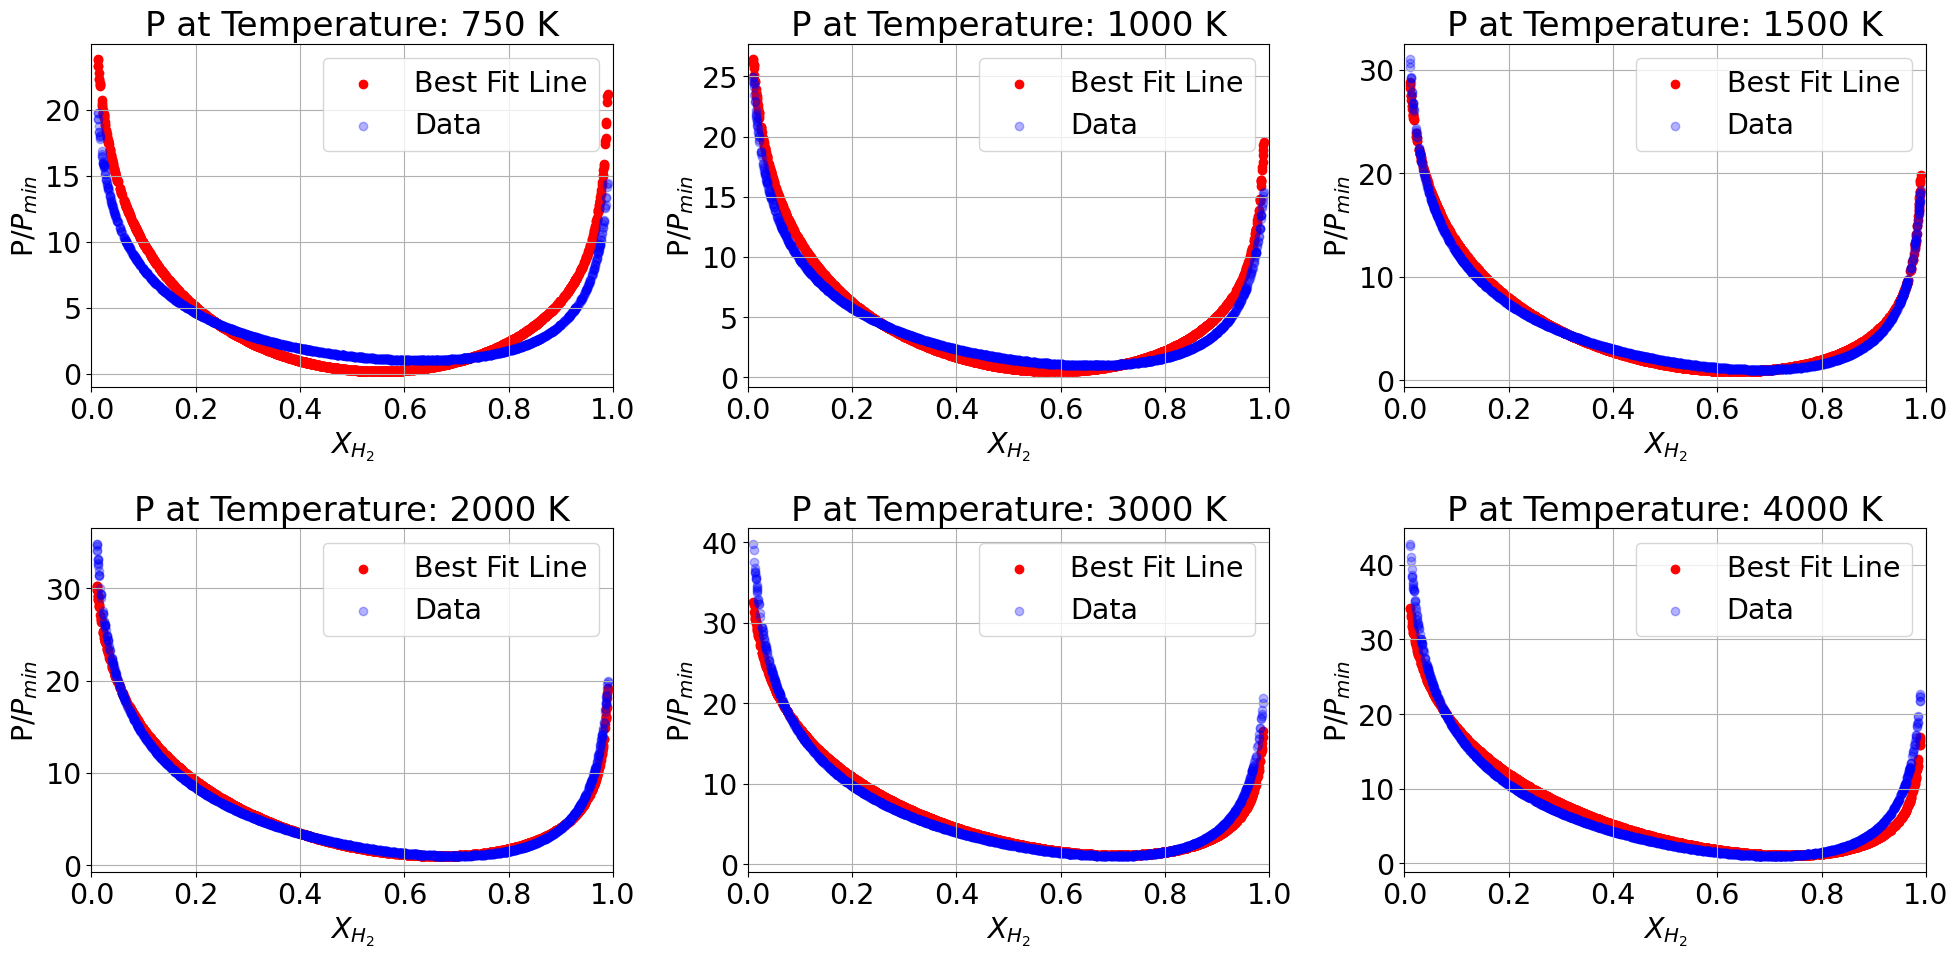

Error in callback _flush_stdio (for post_execute), with arguments args (),kwargs {}:


UnicodeDecodeError: 'utf-8' codec can't decode bytes in position 4094-4095: unexpected end of data

In [17]:
# Temperatures to loop over
temperatures = [750, 1000, 1500, 2000, 3000, 4000]
    
# Create figure and subplots
fig, axes = plt.subplots(2, 3, figsize=(20, 10))
plt.rcParams['font.size'] = 20.5

for i, temp in enumerate(temperatures):
    ind_arr = np.where(T_arr == temp)[0]
    
    # Refined data
    T_plot = T_arr[ind_arr]
    P_plot = P_norm_arr[ind_arr]
    XH2_plot = XH2_arr[ind_arr]

    # Replace x0 with XH2_plot and x1 with XH2_plot
    x0 = XH2_plot
    x1 = T_plot

    # Predict Y values
    Y_pred = ((((2.153667 - x0) - (x0 + x0)) * ((((((-0.0024005608 - (-0.036589067 / 1.2559834)) / np.log(x0)) - 4.2511315) / 0.61533356) + np.log((x1 / x0) - x1)) / 0.37325084)) + x0) + 0.37325084
    # Select subplot
    ax = axes[i // 3, i % 3] 
    
    # Plot the data and the best fit line
    ax.scatter(XH2_plot, Y_pred, label='Best Fit Line', color='red')
    ax.scatter(XH2_plot, P_plot, label='Data', color='blue', alpha=0.3)
    ax.set_xlabel(r'$X_{H_{2}}$')
    ax.set_ylabel('''P/$P_{min}$''')
    ax.set_title(f'P at Temperature: {temp} K')
    ax.legend()
    ax.grid(True)
    ax.set_xlim(0, 1)

plt.tight_layout()
plt.show()